In [ ]:
'''
Alejandro Fernández Trigo
'''

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leer la imagen (monobanda):
img = cv2.imread('10_NorthCarolina.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
# Histograma del ejercicio 1 hecho rápido con OpenCV:
def histograma(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    return hist

In [6]:
# Valores necesarios para el cálculo:
# Frecuencia absoluta:
absoluta = histograma(img)
# Frecuencia acumulada: librería numpy
acumulada = np.cumsum(absoluta)
# Factor de escala:
escala = (255/sum(absoluta))
# Valores cercanos a la frecuencia escalada: librería numpy
valores_escala = np.rint(escala * acumulada)
# Muestro por pantalla solo por debug...
#print("F. absoluta: " +  str(absoluta))
#print("F. acumulada: " + str(acumulada))
#print("F. escala: " + str(escala))
#print("Valores escala: " + str(valores_escala))

In [7]:
# Función ecualización:
def ecual(img):
    copia = img.copy()
    for i in range(copia.shape[0]):
        for j in range(copia.shape[1]):
            # Obtener el valor de la imagen y cambiar la imagen por el valor escala proporcional:
            pixel = copia[i][j]
            copia[i][j] = valores_escala[pixel]
    return copia

In [8]:
# Aplicar el corte: esto puede tardar unos treinta segundos!
img_exp = ecual(img)

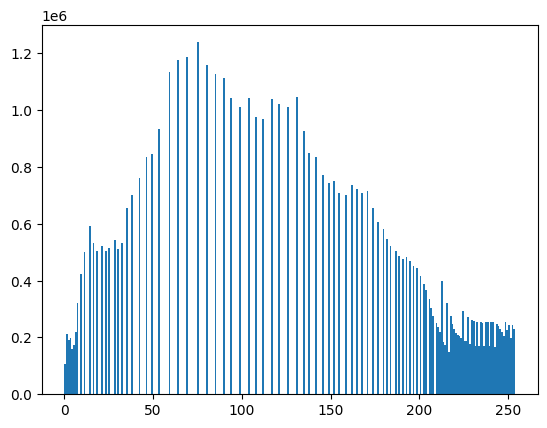

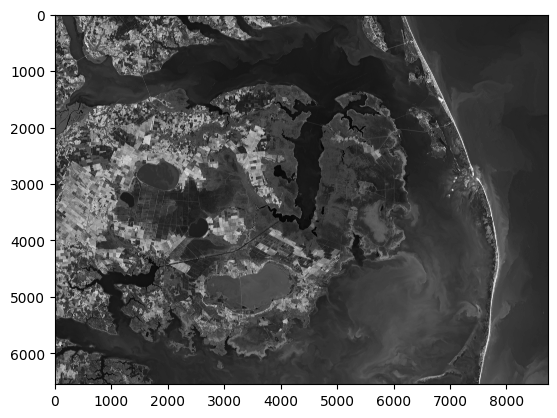

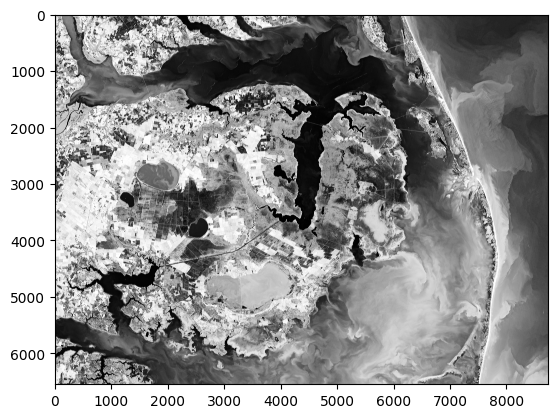

In [9]:
# Dibuja el histograma entre 0 y 254 (esto es del enunciado):
plt.hist(img_exp.ravel(), 255, [0,254], width=1)
plt.show()

# Muestra ambas imágenes:
plt.figure(1)
plt.imshow(img, cmap='gray')

plt.figure(2)
plt.imshow(img_exp, cmap='gray')

In [ ]:
'''
Se puede apreciar la ecualización.
'''